In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/piak6/Downloads/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


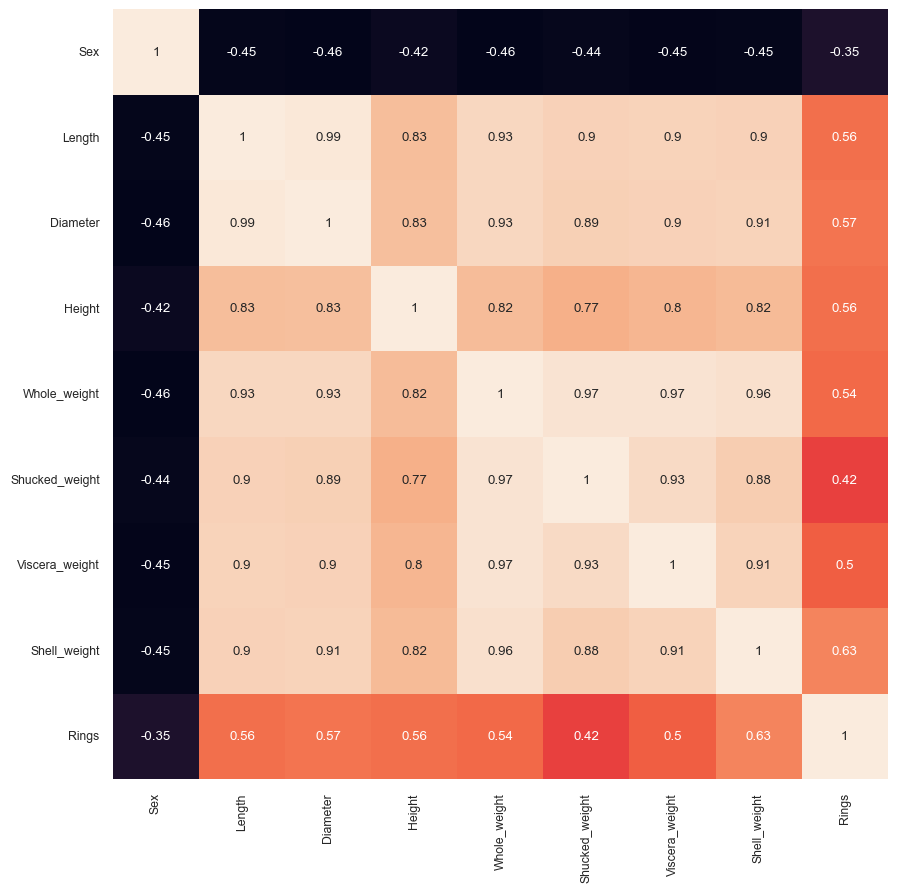

In [19]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})  # M, F, I를 숫자로 변환
df_corr = df.corr()  # 변환 후 상관관계 계산


#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
X = df.drop('Sex',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [25]:
y = df['Sex']
y.head()

id
0    0
1    0
2    1
3    0
4    2
Name: Sex, dtype: int64

In [27]:
Y = pd.get_dummies(y).values

In [29]:
X = X.values

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 0.1822212393938412
평균제곱근오차 0.18222123939384113
평균제곱근오차 [0.21228004 0.18400609 0.15037759]


In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_test.shape, y_test.shape)  # 둘 다 (1045, ?)

model.fit(X_train, y_train)  # 다시 훈련
ly_preds = model.predict(X_test)  # 다시 예측

(836, 8) (836,)


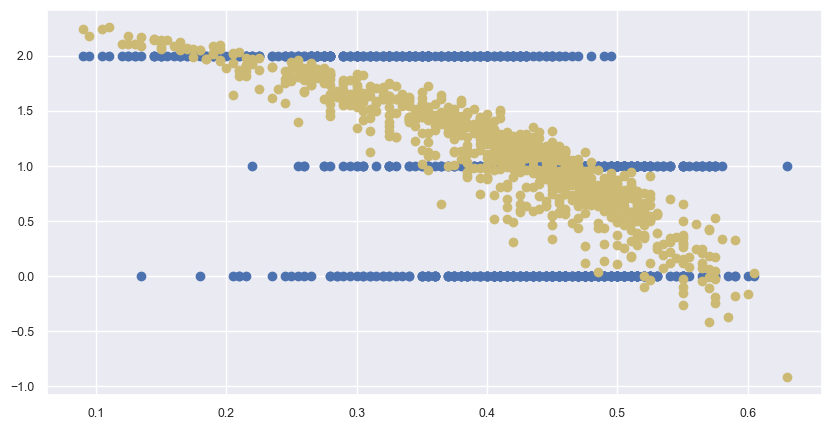

In [89]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test[:, 1], y_test, label='y_test')
plt.scatter(X_test[:, 1], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [91]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.9114832535885168


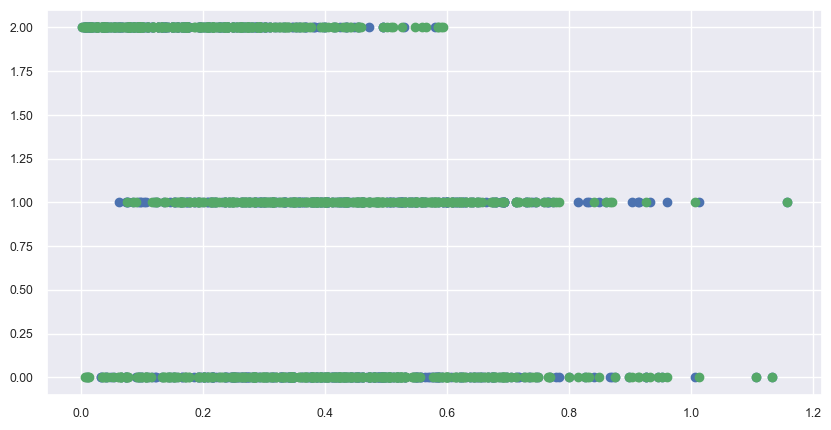

In [97]:
plt.figure(figsize=(10,5))
plt.scatter(X_test[:, 4], y_test, label='y_test')
plt.scatter(X_test[:, 4], dy_preds, c='g', label='dy_preds')
plt.show()         

In [113]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.45898253588516746


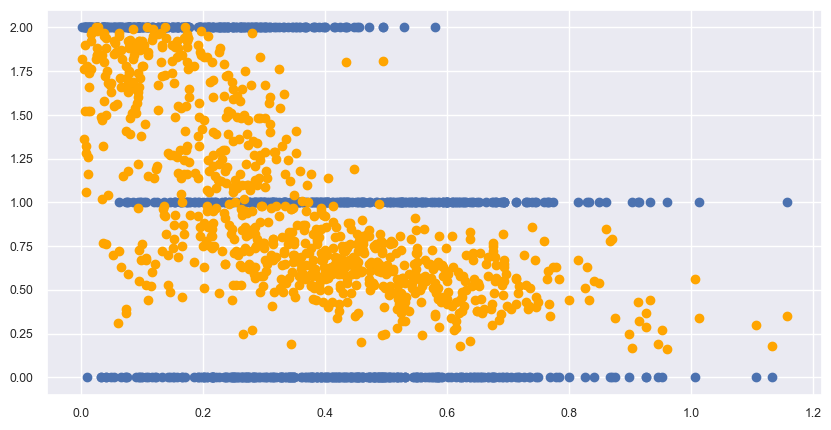

In [117]:
plt.figure(figsize=(10,5))
plt.scatter(X_test[:, 4], y_test, label='y_test')
plt.scatter(X_test[:, 4], ry_preds, c='orange', label='ry_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [35]:
X

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]])

In [37]:
y

id
0       0
1       0
2       1
3       0
4       2
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: Sex, Length: 4177, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 8), (3341, 3), (836, 8), (836, 3))

In [43]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\piak6\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,303 (5.09 KB)

 Trainable params: 1,303 (5.09 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2329 - mse: 0.2329 - val_loss: 0.2243 - val_mse: 0.2243
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2249 - mse: 0.2249 - val_loss: 0.2242 - val_mse: 0.2242
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2244 - mse: 0.2244 - val_loss: 0.2245 - val_mse: 0.2245
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2242 - mse: 0.2242 - val_loss: 0.2240 - val_mse: 0.2240
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2240 - mse: 0.2240 - val_loss: 0.2239 - val_mse: 0.2239
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2239 - mse: 0.2239 - val_loss: 0.2238 - val_mse: 0.2238
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2237 - mse: 0.2237 - val_loss: 0.2235 - val_mse: 0.2235
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2236 - mse: 0.2236 - val_loss: 0.2231 - val_mse: 0.2231
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [46]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2232 - mse: 0.2232 


[0.22316400706768036, 0.22316400706768036]

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))


from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

    
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()


from sklearn.svm import SVR
model = SVR(kernel='linear')

평균제곱근오차 0.1822212393938412


In [51]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [53]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [123]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3341, 8) (836, 8)
(3341,) (836,)


In [143]:
print(pred_svm.shape)  # (836,)이 나와야 정상
print(y_test.shape)  # (836,)이어야 정상

print(X_test.shape)  # (836, 8)이 나와야 정상
print(y_test.shape)  # (836,)이 나와야 정상
print(pred_svm.shape)  # (836,)이 나와야 정상

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_test.shape)  # (836, 8)
print(y_test.shape)  # (836,)

(1045,)
(836,)
(836, 8)
(836,)
(1045,)
(836, 8)
(836,)


In [148]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. 먼저 모델을 학습시키고
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

# 2. 예측을 수행한 다음
pred_svm = clf_svm.predict(X_test)

# 3. 마지막으로 평가 지표를 계산
print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.55622009569378
[[248   3  56]
 [226   4  32]
 [ 54   0 213]]


In [ ]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

In [129]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.5538277511961722
[[ 49 187  60]
 [ 27 189  33]
 [ 15  51 225]]


In [137]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.5059808612440191
[[133  99  64]
 [123  92  34]
 [ 56  37 198]]


In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.5418660287081339
[[143 101  52]
 [134  91  24]
 [ 47  25 219]]
